<a href="https://colab.research.google.com/github/Fernanda101704/Redes_Neurais_2021/blob/main/Projeto_2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
# Projeto 2: Disciplina de Redes Neurais - UFU
# Tema: Processamento de imagens ANN
# Professor: Ubirajara Coutinho Filho
# Aluna: Fernanda Silva Pimenta
# Data: 29/06/2021


In [311]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [312]:
!git clone https://github.com/Fernanda101704/Redes_Neurais_2021
%cd Redes_Neurais_2021

Cloning into 'Redes_Neurais_2021'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 96 (delta 40), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.
/content/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021


In [313]:
# all images are load in variable x...
Arq =['Margaridas.zip','Orquídeas.zip','Rosas.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [314]:
print(img_name)

['Margaridas/', 'Margaridas/Margarida (1).png', 'Margaridas/Margarida (10).png', 'Margaridas/Margarida (100).png', 'Margaridas/Margarida (101).png', 'Margaridas/Margarida (102).png', 'Margaridas/Margarida (103).png', 'Margaridas/Margarida (104).png', 'Margaridas/Margarida (105).png', 'Margaridas/Margarida (106).png', 'Margaridas/Margarida (107).png', 'Margaridas/Margarida (108).png', 'Margaridas/Margarida (11).png', 'Margaridas/Margarida (12).png', 'Margaridas/Margarida (13).png', 'Margaridas/Margarida (14).png', 'Margaridas/Margarida (15).png', 'Margaridas/Margarida (16).png', 'Margaridas/Margarida (17).png', 'Margaridas/Margarida (18).png', 'Margaridas/Margarida (19).png', 'Margaridas/Margarida (2).png', 'Margaridas/Margarida (20).png', 'Margaridas/Margarida (21).png', 'Margaridas/Margarida (22).png', 'Margaridas/Margarida (23).png', 'Margaridas/Margarida (24).png', 'Margaridas/Margarida (25).png', 'Margaridas/Margarida (26).png', 'Margaridas/Margarida (27).png', 'Margaridas/Margarid

In [315]:
y_names = []
for yy in img_name:
  name = yy[1]+yy[1]+yy[3]
  y_names.append(name)

In [316]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [317]:
print(unique_list)

['aag', 'rru', 'ooa']


In [318]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [319]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [320]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [321]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  # X_train.append(cv2.resize(cv2.imread(name),(50,50)))
  X_train.append(cv2.imread(name))
  Y_train.append(y[II])

In [322]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.imread(name))
  Y_test.append(y[II])

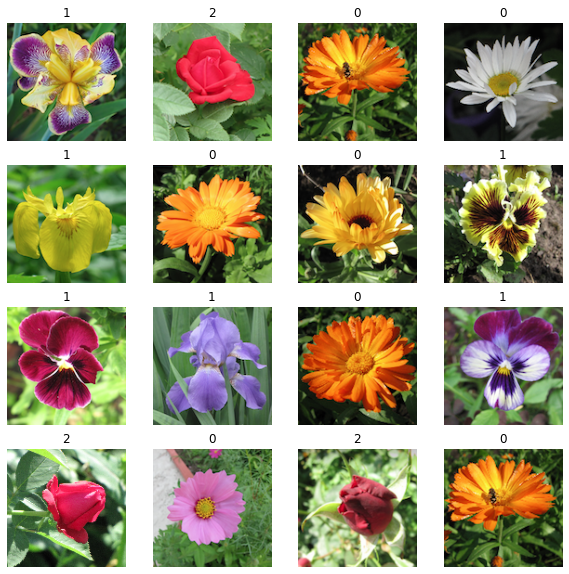

In [323]:
# view some images from the train_ds
# num,cols,dim = np.array(X_train[0]).shape
num = len(Y_train)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_train[kk])
  plt.axis("off")

In [324]:
num

174

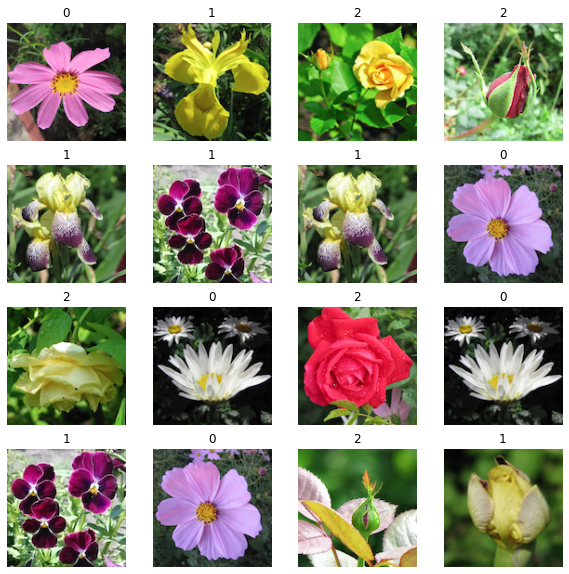

In [325]:
# view some images from the train_ds
# num,- = np.array(X_test).shape
num = len(Y_test)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_test[kk])
  plt.axis("off")

In [326]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [327]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)

In [ ]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()